## Exploratory Data Analysis Assignment-1

In [3]:
# Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine quality dataset
wine_df = pd.read_csv(r"C:\Users\HP\Documents\Practice\Python Practice\EDA\Wine Quality\winequality-red.csv", sep=';')

# Load the student performance dataset
student_df = pd.read_csv(r"C:\Users\HP\Documents\Practice\Python Practice\EDA\Student Performance\stud.csv")


In [21]:
# Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
# predicting the quality of wine.

# Ans:

# Features of wine_df
feature = [f for f in wine_df.columns]
print('Features of wine quality dataset',feature)

corr = wine_df.corr() # Find Correlation
corr_idx = corr.index # Find the indexes of the correlation df

positive_corr, negative_corr = [], []

for i in range(len(corr_idx)):
    if corr[corr_idx[i]]['quality'] > 0:
        positive_corr.append(corr_idx[i])
    else:
        negative_corr.append(corr_idx[i])

print('Wine Quality increases with increasing of the following features\n', positive_corr)
print('\nWine Quality decreases with increasing of the following features\n', negative_corr)

Features of wine quality dataset ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Wine Quality increases with increasing of the following features
 ['fixed acidity', 'citric acid', 'residual sugar', 'sulphates', 'alcohol', 'quality']

Wine Quality decreases with increasing of the following features
 ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']


In [24]:
# Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
# Discuss the advantages and disadvantages of different imputation techniques.

# Ans:

# By performing : "wine_df.isnul().sum()" we can find the missing data
# How to handle missing values:
# 1. Removing Missing Values:
# Advantages: Ensures data integrity, without introducing bias. It is simple and easy to implement.
# Disadvantages: It reduces data size, potentially losing valuable insights. Not feasible if missing data 
# is significant.

# 2. Mean/Median/Mode Imputation:
# Advantages: Preserves dataset size, simple and fast to implement and effective if data is missing at random.
# Disadvantages: Can distort the distribution of data and Mean imputation can be affected by outliers, making median a 
# better alternative for skewed distributions.

# 3. K-Nearest Neighbors (KNN) Imputation:
# Advantages: Uses patterns within the data, making imputation more accurate.Uses patterns within the data, 
# making imputation more accurate.
# Disadvantages: Computationally expensive for large datasets. Sensitive to the choice of k and distance metrices.

# 4. Regression Imputation:
# Advantages: Captures relationships between variables. Provides better estimations compared to mean/median imputation.
# Disadvantages: Prone to overfitting and computationally expensive.

# 5. Multiple Imputation:
# Advantages: Accounts for uncertainty in missing data and provides robust estimates.
# Disadvantages: Computationally expensive and complex to implement

In [6]:
# Q3. What are the key factors that affect students' performance in exams? How would you go about
# analyzing these factors using statistical techniques?

# Ans:

# Factors that can affect the student's performance in exams:
# 1: race_ethnicity
# 2: parental_level_of_education
# 3: test_preparation_course

# How to analyze them:
# Step 1: Encode the categorical columns into numerical
# Step 2: Make another column as total_score.
# Step 3: Find the correlation with the total_score.
# Step 4: Evalute the strong positive and strong negative relations.

In [11]:
# Q4. Describe the process of feature engineering in the context of the student performance data set. How
# did you select and transform the variables for your model?

# Ans:


# Feature Engineering all about handling missing values, handling duplicate data, transforming categorical data into 
# numerical data, making new features according to the model demand, handling imbalanced dataset, feature selection 
# and performing feature extraction(PCA).

# Feature Selection:
# For feature selection we can take those features who are strongly correlated to the output feature.
# Feature transformation:
# gender and test_preparation_course: Binary Encoding
# race_ethnicity and parental_level_of_education: Oone-Hot Encoding

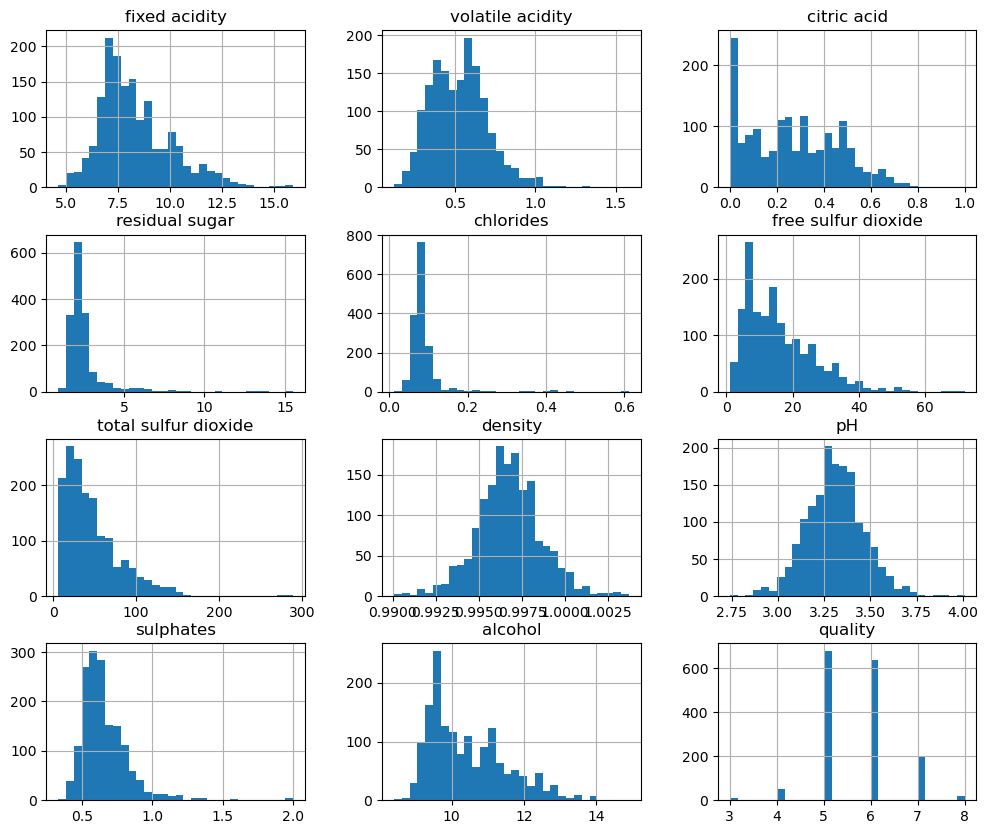

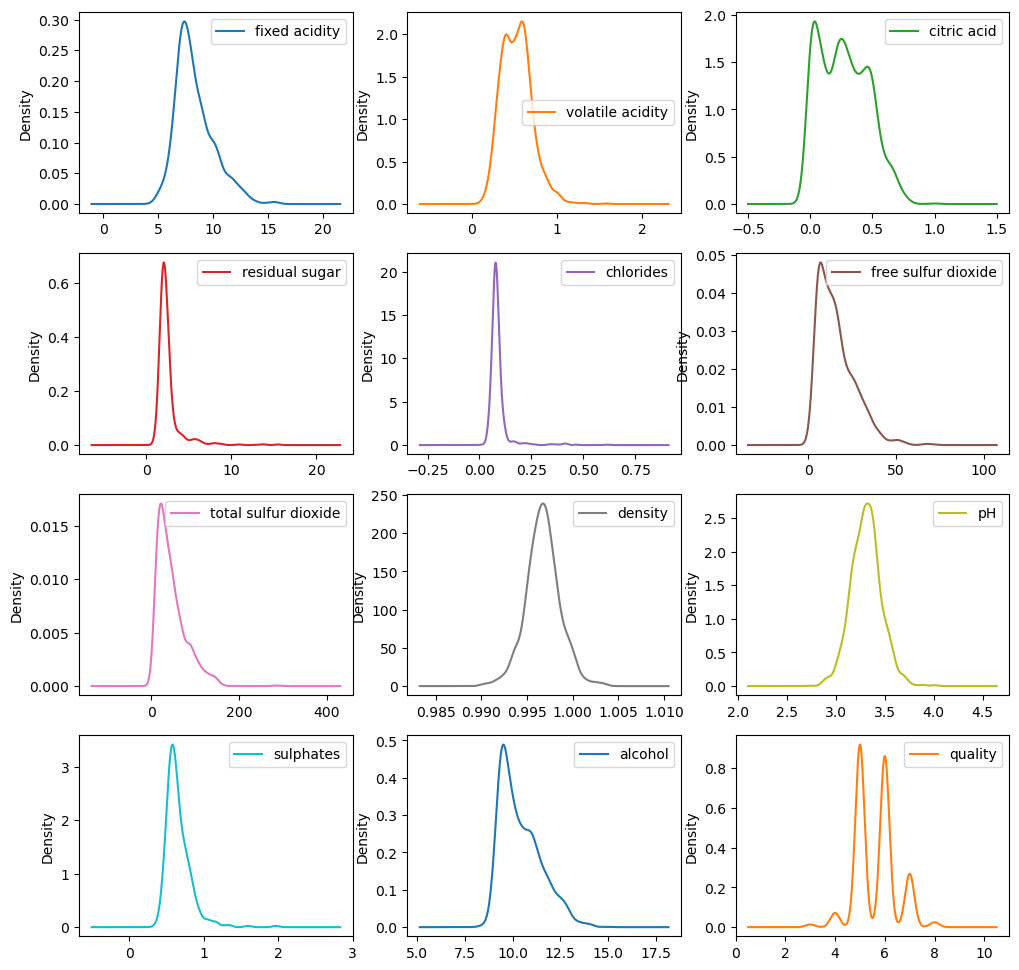

fixed acidity: Skewness = 0.9818292953262073, Kurtosis = 1.1248563352037486
volatile acidity: Skewness = 0.6709623963499574, Kurtosis = 1.2179633893005306
citric acid: Skewness = 0.3180385895475358, Kurtosis = -0.7902825153036646
residual sugar: Skewness = 4.536394788805638, Kurtosis = 28.524437824252235
chlorides: Skewness = 5.675016527504259, Kurtosis = 41.581708043675775
free sulfur dioxide: Skewness = 1.249393847434253, Kurtosis = 2.01348999733378
total sulfur dioxide: Skewness = 1.5141091878506638, Kurtosis = 3.7941717664905665
density: Skewness = 0.07122077153539946, Kurtosis = 0.9274107990478333
pH: Skewness = 0.19350175891005525, Kurtosis = 0.8006714441211544
sulphates: Skewness = 2.426393455449087, Kurtosis = 11.6798841115311
alcohol: Skewness = 0.8600210646566755, Kurtosis = 0.1956543762123122
quality: Skewness = 0.21759720553467285, Kurtosis = 0.2920311389729804


In [13]:
# Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
# of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
# these features to improve normality?


# Ans:


# Load the wine quality dataset
wine_df = pd.read_csv(r"C:\Users\HP\Documents\Practice\Python Practice\EDA\Wine Quality\winequality-red.csv", sep=';')


# Plot histograms for each numerical feature
wine_df.hist(bins=30, figsize=(12, 10))
plt.show()

# KDE plots
wine_df.plot(kind='density', subplots=True, layout=(4, 3), figsize=(12, 12), sharex=False)
plt.show()


from scipy.stats import skew, kurtosis  

for col in wine_df.columns:
    if wine_df[col].dtype != "object":  
        print(f"{col}: Skewness = {skew(wine_df[col])}, Kurtosis = {kurtosis(wine_df[col])}")



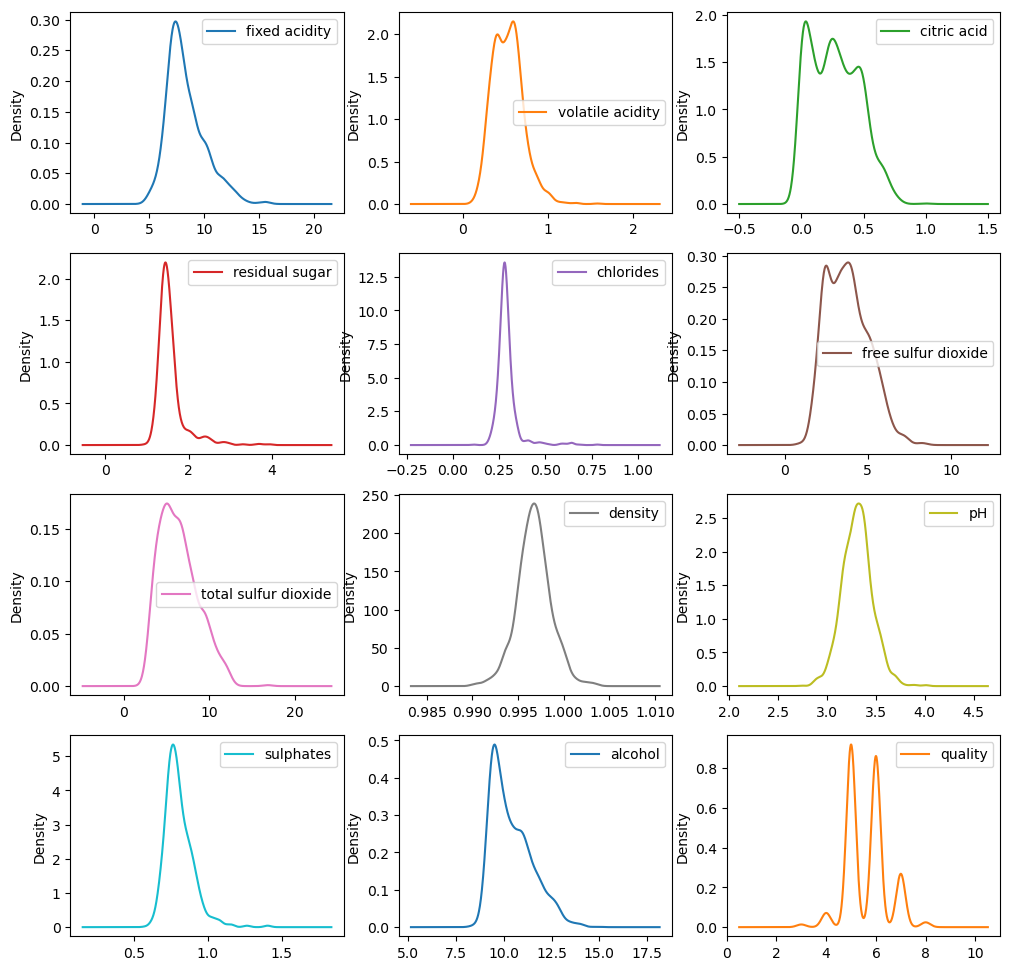

In [14]:
# Square Root Transformation:
# wine_df['feature_name'] = np.sqrt(wine_df['feature_name'])


for col in wine_df.columns:
    if wine_df[col].dtype != "object":  
        # print(f"{col}: Skewness = {skew(wine_df[col])}, Kurtosis = {kurtosis(wine_df[col])}")
        Skewness = skew(wine_df[col])
        if Skewness > 1 or Skewness < -1:
            wine_df[col] = np.sqrt(wine_df[col])

# KDE plots
wine_df.plot(kind='density', subplots=True, layout=(4, 3), figsize=(12, 12), sharex=False)
plt.show()

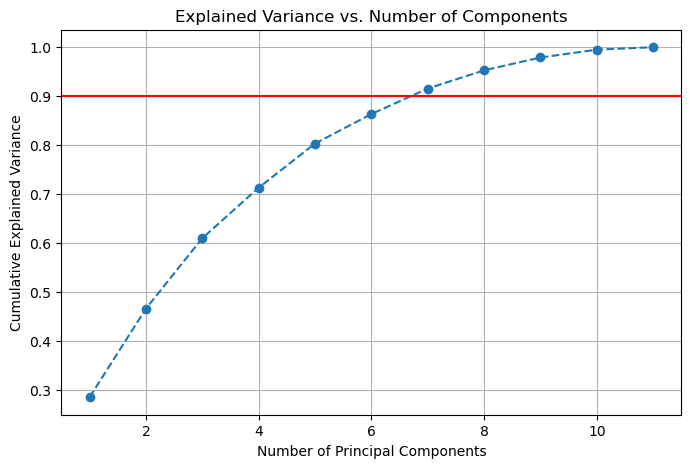

In [17]:
# Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
# features. What is the minimum number of principal components required to explain 90% of the variance in
# the data?

# Ans:


from sklearn.decomposition import PCA  
from sklearn.preprocessing import StandardScaler


X = wine_df.drop(columns=['quality'], errors='ignore') 

scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)  # Normalize the data  


pca = PCA()  
X_pca = pca.fit_transform(X_scaled)  

# Compute explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)



plt.figure(figsize=(8, 5))  
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')  
plt.axhline(y=0.90, color='r', linestyle='-')  # Line at 90% variance
plt.xlabel('Number of Principal Components')  
plt.ylabel('Cumulative Explained Variance')  
plt.title('Explained Variance vs. Number of Components')  
plt.grid()  
plt.show()


In [18]:
num_components = np.argmax(explained_variance >= 0.90) + 1  
print(f"Minimum number of principal components needed to explain 90% variance: {num_components}")


Minimum number of principal components needed to explain 90% variance: 7
